In [166]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # all the layers are in tf.keras.layers

In [167]:
dense = Dense(units=2, activation="relu", input_shape=[3,])
# units: the number of neurons on the layer
# activation: the choice of activation function, the most common activation
#    functions can be named with strings, but you can use keras functions
#    or custom functions instead!
# input_shape: is optional, it can be either a list or tuple indicating the shape
#    of what will be entering the layer, we'll learn more about this later in the
#    lecture

In [168]:
from tensorflow.keras.layers import BatchNormalization
bn = BatchNormalization()
# That's it you usually will not need anything else in order to instanciate
# a batch normalization layer, but feel free to check the documentation
# for additional information!

In [169]:
from tensorflow.keras.layers import Dropout
do = Dropout(rate=0.2)
# The important parameter when instanciating the DropOut layer is rate, it
# indicates the proportion of outputs from the previous that will randomly
# be set to zero at each batch passing forward.
# The closer to one, the higher proportion of outputs set to zero and harder
# it will be for the model to overfit, but also to train
# The closer to zero, the lower proportion of outputs set to zero and the easier
# it will be for the model to train, but also overfit

In [170]:
from tensorflow.keras.activations import * # contains all the activation functions
# in the form of python functions
import numpy as np
from plotly import graph_objects as go

x = np.linspace(-5,5,500)

fig = go.Figure(data=[
                      go.Scatter(x=x,
                                 y=relu(x), # relu activation function
                                 mode = "lines",
                                 name = "ReLu",
                                 line=dict(
                                     color=color_chart[0]
                                 )),
                      go.Scatter(x=x,
                                 y=sigmoid(x), # sigmoid activation function
                                 mode = "lines",
                                 name = "Sigmoid",
                                 line=dict(
                                     color=color_chart[1]
                                 )),
                      go.Scatter(x=x,
                                 y=tanh(x), # tanh activation function
                                 mode = "lines",
                                 name = "TanH",
                                 line=dict(
                                     color=color_chart[2]
                                 )),
                      go.Scatter(x=x,
                                 y=swish(x), # swish activation function
                                 mode = "lines",
                                 name = "Swish",
                                 line=dict(
                                     color=color_chart[3]
                                 )),
                      go.Scatter(x=x,
                                 y=elu(x), # elu activation function, mix of tanh and relu
                                 mode = "lines",
                                 name = "Elu",
                                 line=dict(
                                     color=color_chart[5]
                                 )),
                      go.Scatter(x=x,
                                 y=selu(x), # same as elu but converges to lower for negative values
                                 mode = "lines",
                                 name = "Selu",
                                 line=dict(
                                     color=color_chart[4]
                                 ))
])

fig.show()

# another activation function we have'nt yet talked about although it will come
# in handy for multi classification problems is "softmax" we'll have many
# occasions to use it in practice.

In [171]:
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU # not all activation
# are available in this form we are selecting three examples here

# Define activation functions
relu_ = ReLU()
lrelu = LeakyReLU(negative_slope=0.1)  # Use `negative_slope` instead of `alpha`
elu_ = ELU()

In [172]:
from tensorflow.keras.regularizers import L1, L2, L1L2

l1 = L1(l1=0.01) # the l1 parameter sets the strength of the regularization, the
# higher l1 is, the more parameters in the layer will be set to zero

l2 = L2(l2=0.01) # the l2 parameter indicates the strength of the regularization,
# the higher l2 is, the smaller absolut values the parameters on the lay will be

l1l2 = L1L2(l1=0.01, l2=0.1) # l1 sets the strengthof the Lasso penalty while
# l2 sets the strength of the Ridge penalty

# In order to include these in a specific layer you should proceed as follows:
dense_L2 = Dense(units=4, activation="relu", kernel_regularizer=l2)
dense_L2 = Dense(units=4, activation="relu", kernel_regularizer="l2") # applies
# L2 regularization with default values

# This technique forces you to manually add regularization to specific layers
# as opposed to the whole model.

In [173]:
from tensorflow.keras.models import Sequential

# let's how we can create a model with three Dense layers by using the .add method
sequential_model = Sequential()
sequential_model.add(Dense(8,"relu", input_shape=[2])) # indicate in the first layer
# the shape of the input you will feed it
# for example tabular data with 2 columns -> input_shape = [2]
sequential_model.add(BatchNormalization())
sequential_model.add(Dense(4,"relu"))
sequential_model.add(Dense(1,"sigmoid"))

# In order to get a sense of what the model looks like, use the .summary() method
sequential_model.summary()
# Layer (type): indicates the name of the layer and its type
# Output Shape: indicates the shape of the output from the layer
# Param #: indicates the number of parameters on this layer, for example on the
#   first layer, there are 8 neurons that receive 2 variables, each neuron has
#   a weight for each incoming input, thats 2x8=16, plus one bias per neuron
#   that's 8, 16+8=24 parameters in total.

# Note on shapes: in (None,8) the None represents the batch size, but since the
# model can work with batches of any sizes it will always say None

# Total params: Indicates the number of parameters in total in the model.
# Trainable params: Indicates the number of parameters that will be updated by
#   gradient descent during training.
# Non-trainable params: Indicates the numberof parameters that will not be updated
#   by gradient descent during training. It is the case for batchnormalization
#   parameters for example, or parameters that we expecitally chose not to train,
#   but more on that in further lectures.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 16 (64.00 B)

In [174]:
# another way of building a sequential model is to directly feed a list of layers
# during instanciation:

sequential_model2 = Sequential([
                                Dense(8, "relu", input_shape=[2]),
                                BatchNormalization(),
                                Dense(4,"relu"),
                                Dense(1, "sigmoid")
])

sequential_model2.summary()

# the model is identical to the one created before even though we built them in
# different ways.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 16 (64.00 B)

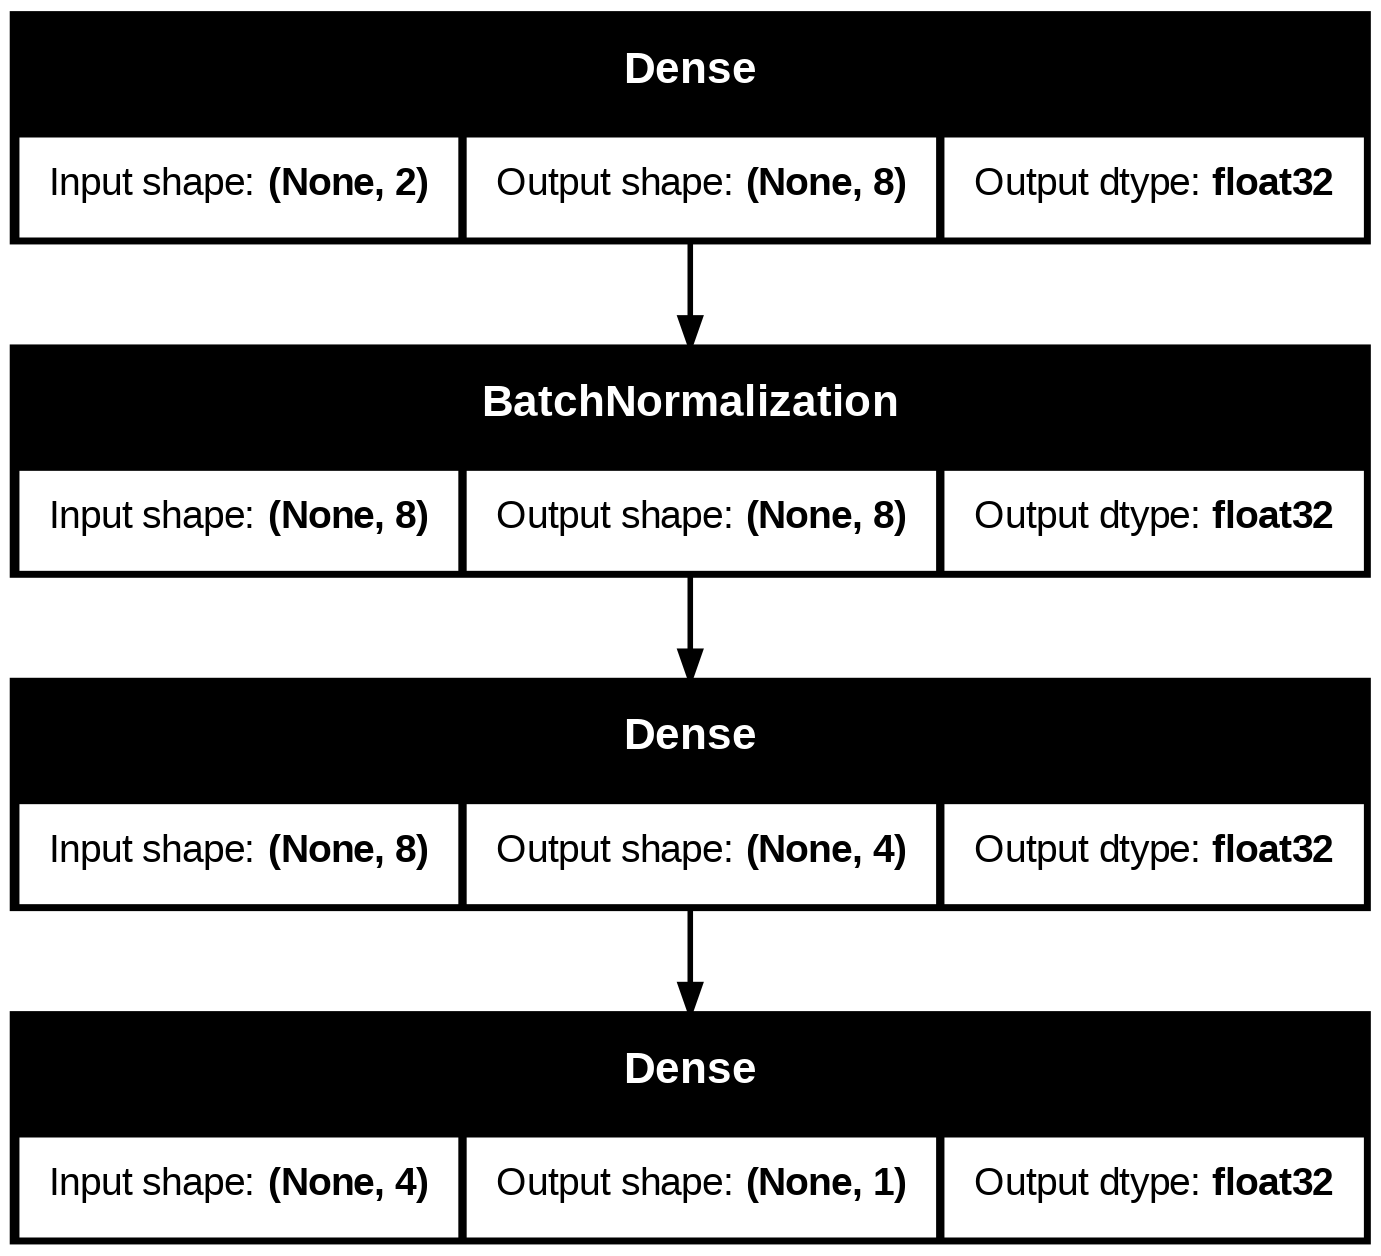

In [175]:
# Here is another way of visualizing your model that is especially convenient
# with more complicated architecture:
tf.keras.utils.plot_model(
    sequential_model,
    show_shapes=True,
    show_dtype=True
)

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28            │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_123 (Dense)         │ (None, 8)              │             24 │ input_layer_28[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_29    │ (None, 8)              │             32 │ dense_123[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 8)              │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_125 (Dense)         │ (None, 4)              │             36 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_124 (Dense)         │ (None, 4)              │             36 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_126 (Dense)         │ (None, 4)              │             20 │ dense_125[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 8)              │              0 │ dense_124[0][0],       │
│ (Concatenate)             │                        │                │ dense_126[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_127 (Dense)         │ (None, 1)              │              9 │ concatenate_5[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 16 (64.00 B)

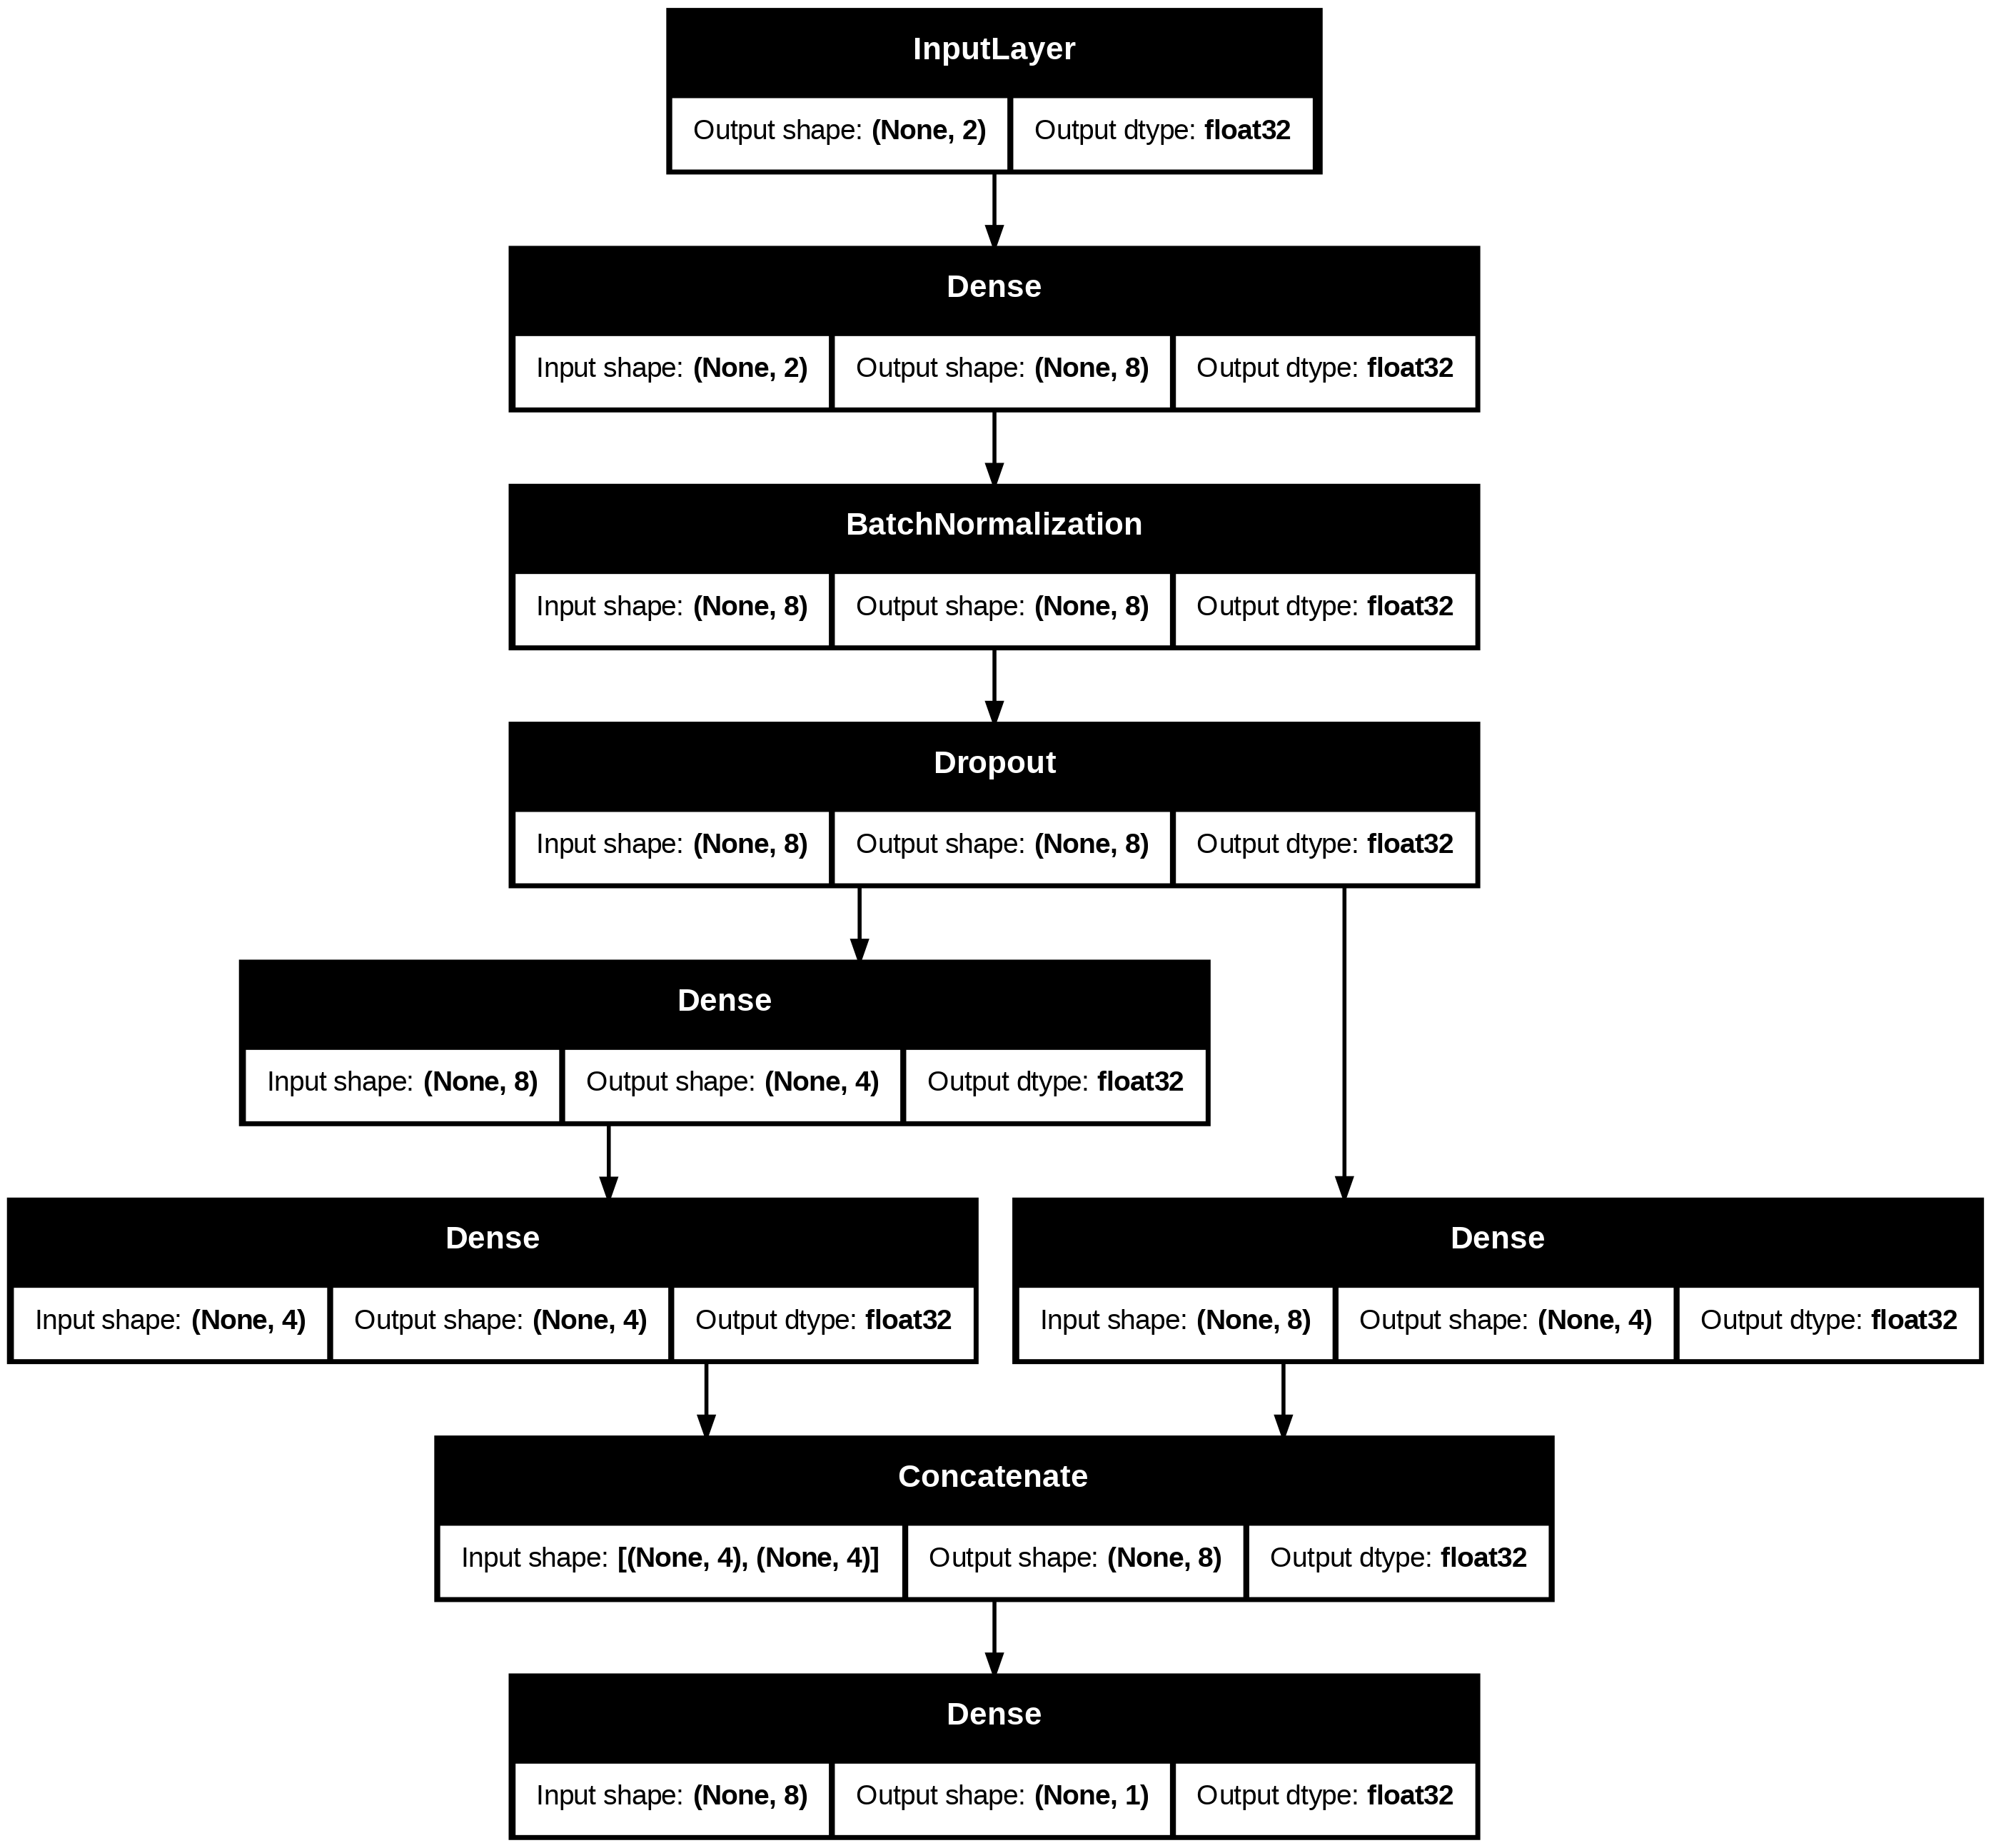

In [176]:
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Définir l'entrée du modèle
input_layer = Input(shape=[2])  # Spécifier la forme des données d'entrée

# Instancier les couches
dense1 = Dense(8, activation="relu")
dense2a = Dense(4, activation="relu")
dense2b = Dense(4, activation="relu")
dense2c = Dense(4, activation="relu")
dense3 = Dense(1, activation="sigmoid")
bn = BatchNormalization()
do = Dropout(0.2)

# Construire le modèle
x = dense1(input_layer)
x = bn(x)
x = do(x)
xa = dense2a(x)
xb = dense2b(x)
xc = dense2c(xb)
x = concatenate([xa, xc])  # Combiner les sorties des couches
output_layer = dense3(x)

# Créer le modèle final
model = Model(inputs=input_layer, outputs=output_layer)

# Afficher le résumé du modèle
model.summary()

# Générer une visualisation du modèle
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [177]:
# Let's reuse the sequential model we used before
sequential_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 16 (64.00 B)

In [178]:
# Let's now create some input data in order to feed to the model
data = np.array([[1,2]]) # we have to make a two dimensional array
# with a number of rows and two columns because the input_shape is [2] which
# translates to (None, 2) when you add the batch size.

# Let's now feed this data to the model
# The model class has a __call__ method so we can simply it as a function
print("model output:",sequential_model(data))

# The model is not trained yet but this is actually what predictions will look
# like when it will be

model output: tf.Tensor([[0.72594905]], shape=(1, 1), dtype=float32)


In [179]:
# Let's use the non-sequential model for a change, although this technique works
# on any object of class Model
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

print("Model parameters:", model.variables)

# The attribute variables gives you access to all the parameters of the model
# trainable and non-trainable, you see here that this attribute is a list of
# variable tensor objects with names corresponding to the names of the layers
# they are attached to
print("\n ----------------------------------------------------------- \n")
print("Model trainable parameters:", model.trainable_variables)

# If you wish to retrieve only the trainable weights of the model (and this will
# come in handy when we learn more about tf) you may use the trainable_variables
# attribute.

Model parameters: [<KerasVariable shape=(2, 8), dtype=float32, path=dense_123/kernel>, <KerasVariable shape=(8,), dtype=float32, path=dense_123/bias>, <KerasVariable shape=(8,), dtype=float32, path=batch_normalization_29/gamma>, <KerasVariable shape=(8,), dtype=float32, path=batch_normalization_29/beta>, <KerasVariable shape=(8,), dtype=float32, path=batch_normalization_29/moving_mean>, <KerasVariable shape=(8,), dtype=float32, path=batch_normalization_29/moving_variance>, <KerasVariable shape=(2,), dtype=int64, path=seed_generator_17/seed_generator_state>, <KerasVariable shape=(8, 4), dtype=float32, path=dense_125/kernel>, <KerasVariable shape=(4,), dtype=float32, path=dense_125/bias>, <KerasVariable shape=(8, 4), dtype=float32, path=dense_124/kernel>, <KerasVariable shape=(4,), dtype=float32, path=dense_124/bias>, <KerasVariable shape=(4, 4), dtype=float32, path=dense_126/kernel>, <KerasVariable shape=(4,), dtype=float32, path=dense_126/bias>, <KerasVariable shape=(8, 1), dtype=float

In [180]:
# Let's display the names of all the layers in the model:
for layer in model.layers:
  print(layer.name)

input_layer_28
dense_123
batch_normalization_29
dropout_17
dense_125
dense_124
dense_126
concatenate_5
dense_127


In [181]:
# Let's for example get the specific content of layer dense_31
specific_layer = model.layers[1]
specific_layer = model.get_layer(name=model.layers[1].name)

# we can extract the weights from this specific layer
specific_layer.trainable_variables

[<KerasVariable shape=(2, 8), dtype=float32, path=dense_123/kernel>,
 <KerasVariable shape=(8,), dtype=float32, path=dense_123/bias>]

In [182]:
# Because the weights are variable tensors we may assing new values to them
specific_layer.bias.assign([1,2,3,4,5,6,7,8])
print("Bias:",specific_layer.bias) # accesses the bias
# the values in the layer are now changedin place, which means the model was
# affected as well
print("\n --------------------------------- \n")

# we will assign the value zero to each weight in the layer's kernel, aka the
# weights that are not part of the bias
specific_layer.kernel.assign(tf.zeros_like(specific_layer.kernel))
print("Kernel/parameters:",specific_layer.kernel)

Bias: <KerasVariable shape=(8,), dtype=float32, path=dense_123/bias>

 --------------------------------- 

Kernel/parameters: <KerasVariable shape=(2, 8), dtype=float32, path=dense_123/kernel>


In [183]:
# We can also extract the output of that layer, which can be very useful if you
# wish to see what is coming out of a specific layer
specific_layer.output

# we can now create a new model
model_intermediate = tf.keras.Model(inputs=model.input, outputs=specific_layer.output)
model_intermediate(data)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[1., 2., 3., 4., 5., 6., 7., 8.]], dtype=float32)>

In [184]:
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy

# MSE
mse = MeanSquaredError()

# Convert lists to tensors
y_true_mse = tf.constant([[1.0]])  # TensorFlow tensor
y_pred_mse = tf.constant([[2.0]])  # TensorFlow tensor

# Calculate MSE loss
print("MSE:", mse(y_true_mse, y_pred_mse))

# Binary Cross Entropy: - log(P(y=1))
# Ideal for binary classification problems
bce = BinaryCrossentropy()

# Convert lists to tensors for BCE
y_true_bce = tf.constant([[0.0]])  # TensorFlow tensor
y_pred_bce = tf.constant([[0.12]])  # TensorFlow tensor

# Calculate BCE loss
print("Binary cross entropy:", bce(y_true_bce, y_pred_bce))

# Categorical Cross Entropy: - sum(y==i x log(P(y==i)))
# Non-sparse for problems where the target variable is in dummy form
cce = CategoricalCrossentropy()

# Convert lists to tensors for CCE
y_true_cce = tf.constant([[0, 0, 0, 1]])  # One-hot encoded target
y_pred_cce = tf.constant([[0.2, 0.1, 0.15, 0.55]])  # Probabilities

# Calculate CCE loss
print("Categorical cross entropy:", cce(y_true_cce, y_pred_cce))

# Sparse categorical cross entropy: y_true must be 1D, y_pred must be 2D
scce = SparseCategoricalCrossentropy()

# Convert lists to tensors for Sparse CCE
y_true_scce = tf.constant([3])  # Single target class as index (1D tensor)
y_pred_scce = tf.constant([[0.2, 0.1, 0.15, 0.55]])  # Probabilities (2D tensor)

# Calculate Sparse CCE loss
print("Sparse categorical cross entropy:", scce(y_true_scce, y_pred_scce))

MSE: tf.Tensor(1.0, shape=(), dtype=float32)
Binary cross entropy: tf.Tensor(0.12783338, shape=(), dtype=float32)
Categorical cross entropy: tf.Tensor(0.597837, shape=(), dtype=float32)
Sparse categorical cross entropy: tf.Tensor(0.597837, shape=(), dtype=float32)


In [185]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001) # For this optimizer we can define the base
# learning rate that the algorithm will use and adapt during training

In [186]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# We need to define the initial learning rate, decay_steps indicates the number
# of steps before the learning rate decreases of one time the decay_rate.
ed = ExponentialDecay(
    initial_learning_rate = 0.001, decay_steps = 100, decay_rate = 0.96
)

# The call of the Exponential decay instance works in the following way
initial_learning_rate = 0.001
decay_steps = 10
decay_rate = 0.96
def decayed_learning_rate(step):
    return initial_learning_rate * decay_rate ** (step / decay_steps)
x = np.linspace(0,1000,1000)

# Let's see how this works visually
fig = go.Figure(data=[
                      go.Scatter(
                          x = x,
                          y = decayed_learning_rate(x),
                          mode = "lines",
                          line=dict(
                              color = color_chart[0]
                            ),
                          name = "learning rate"
                          )
])

fig.update_layout(
    title="Learning rate schedule",
    xaxis_title="Step",
    yaxis_title="Learning rate"
    )

fig.show()

# If you wish to add this learning rate schedule to your optimizer you can do it
# as follows
opt_schedule = Adam(learning_rate=ed)

In [187]:
# Let's compile our model
model.compile(optimizer=opt,
              loss=bce)

In [188]:
from tensorflow.keras.metrics import BinaryAccuracy

model.compile(optimizer=opt,
              loss=bce,
              metrics=[BinaryAccuracy()])
# the argument metrics takes a list of metrics from keras

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)                    │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 107 (428.00 B)

 Non-trainable params: 16 (64.00 B)

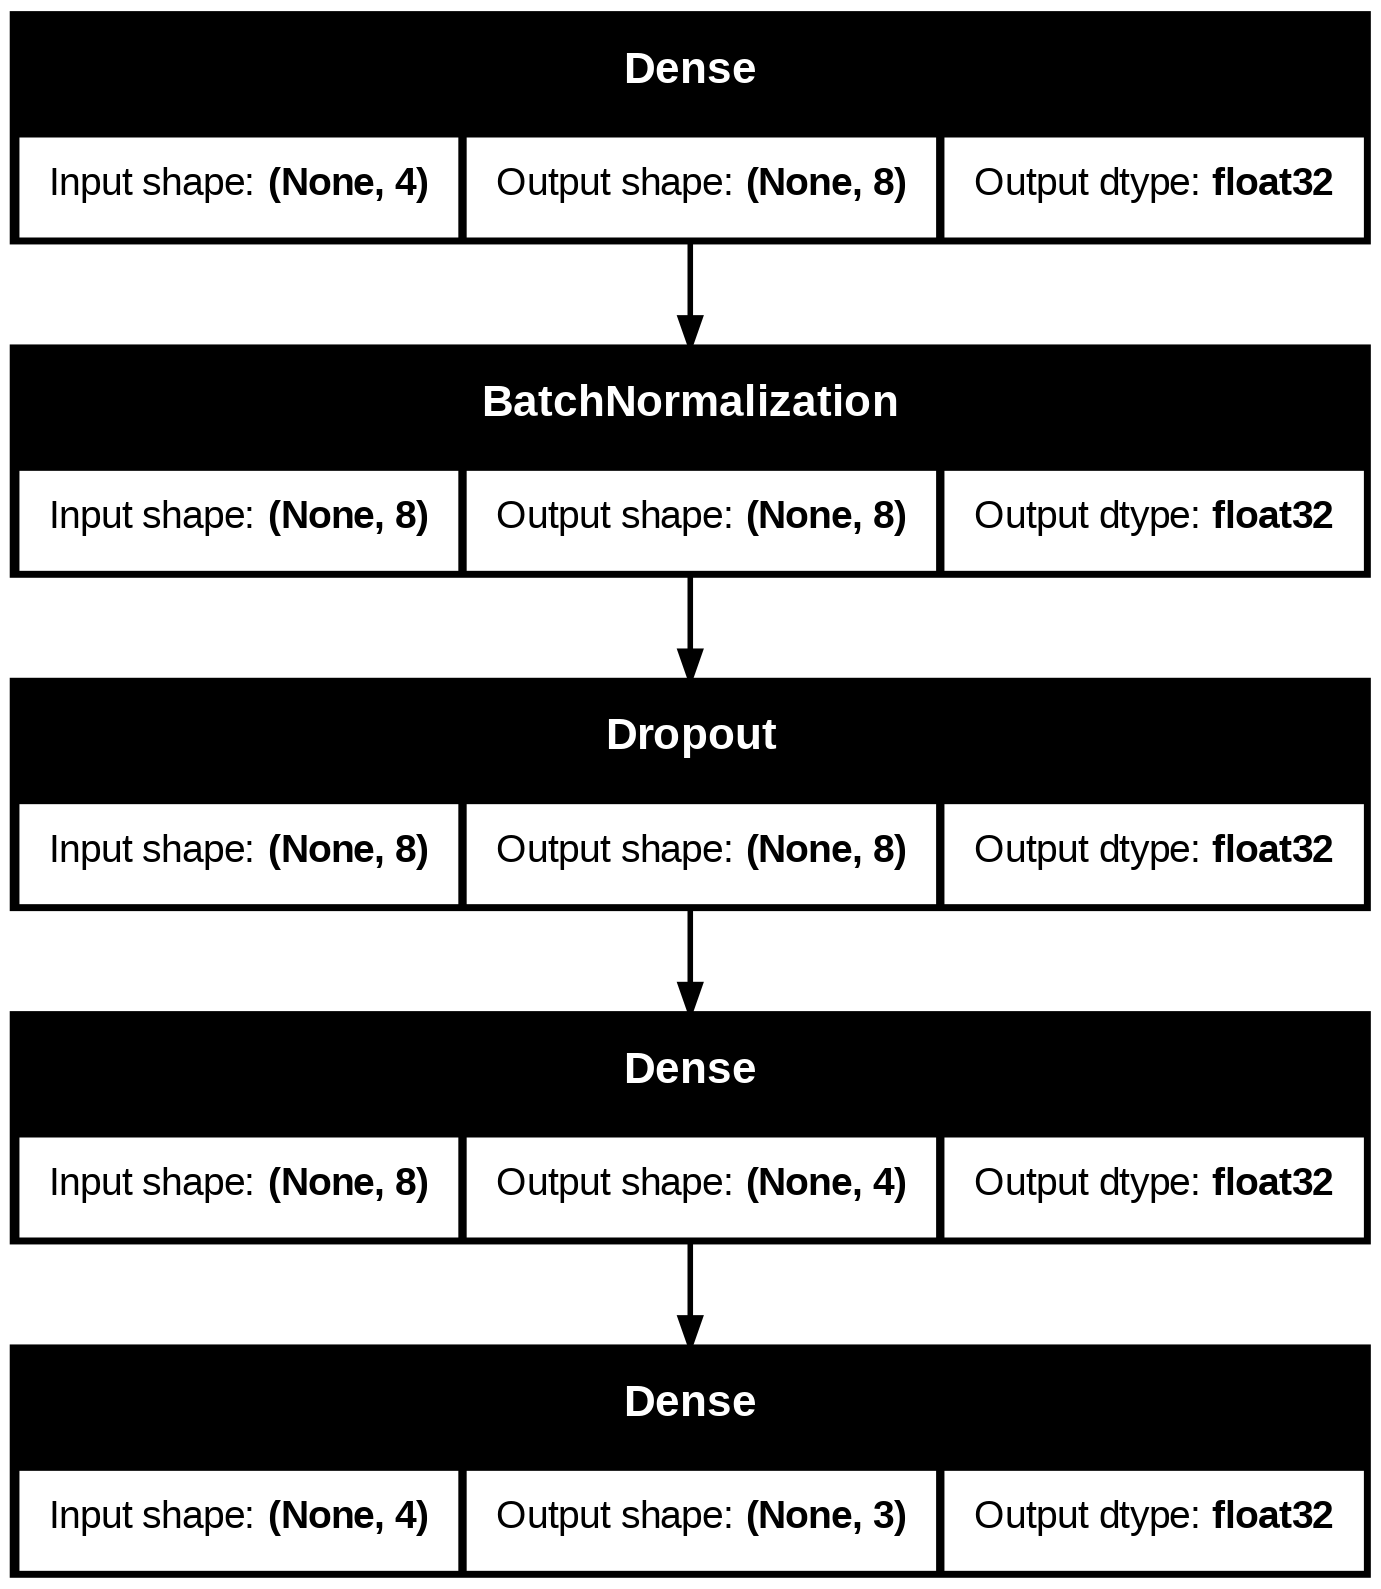

In [189]:
from sklearn.datasets import load_iris

iris = load_iris() # load the data

data = iris.data # store training variables in data
target = iris.target # store target variable in target

from sklearn.model_selection import train_test_split
# Charger les données Iris
iris = load_iris()
data = iris.data
target = iris.target

# Diviser les données : 60% train, 20% validation, 20% test
X_train, X_valtest, y_train, y_valtest = train_test_split(
    data, target, test_size=0.4, stratify=target
)
X_val, X_test, y_val, y_test = train_test_split(
    X_valtest, y_valtest, test_size=0.5, stratify=y_valtest
)

# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Create the tensor slice datasets
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

# shuffle and batch
train_batch = train.shuffle(len(X_train)).batch(4)
val_batch = val.shuffle(len(X_val)).batch(4)
test_batch = test.shuffle(len(X_test)).batch(4)

# Create the model
model = Sequential([
    # Première couche dense avec ReLU
    Dense(8, activation="relu", input_shape=[data.shape[1]]),
    BatchNormalization(),
    Dropout(0.2),
    # Deuxième couche dense avec ReLU
    Dense(4, activation="relu"),
    # Dernière couche dense avec Softmax pour classification multiclasses
    Dense(len(np.unique(target)), activation="softmax"),
])

# Afficher un résumé du modèle
model.summary()

# Générer une visualisation du modèle
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [190]:
# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

In [191]:
# We use .fit in order to start training the model
# the first argument is the the batch dataset containing the training data
# epochs indicates the number of epochs (the number of times each batch is going
# to be used for training) to train for
# validation_data is the data we use to measure overfitting during training, the
# model will not train on this data but compute the performance metrics on it at
# the end of each epoch
history = model.fit(train_batch, epochs=10, validation_data=val_batch)

# We save the training in an object history so we can retreive the training
# information later on.

print("\n ------ \n","training history:",history.history)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.2606 - sparse_categorical_accuracy: 0.2871 - val_loss: 1.2432 - val_sparse_categorical_accuracy: 0.3000
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2101 - sparse_categorical_accuracy: 0.4081 - val_loss: 1.1928 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0995 - sparse_categorical_accuracy: 0.4448 - val_loss: 1.1367 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.4338 - val_loss: 1.0710 - val_sparse_categorical_accuracy: 0.6000
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9456 - sparse_categorical_accuracy: 0.5402 - val_loss: 1.0051 - val_sparse_categorical_accuracy: 0.7667
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9207 - sparse_categorical_accuracy: 0.5711 - val_loss: 0.9442 - val_sparse_categorical_accuracy: 0.8000
Epoch 7/10
23/2

In [192]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

In [193]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["sparse_categorical_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_sparse_categorical_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

In [194]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # load the data

data = cancer.data # store training variables in data
target = cancer.target # store target variable in target

from sklearn.model_selection import train_test_split
# Split 60% in train 20% in val 20% in test
X_train, X_valtest, y_train, y_valtest = train_test_split(data,
                                                          target,
                                                          test_size=0.4,
                                                          stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest,
                                                test_size=0.5,
                                                stratify=y_valtest)

# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Create the tensor slice datasets
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

# shuffle and batch
train_batch = train.shuffle(len(X_train)).batch(4)
val_batch = val.shuffle(len(X_val)).batch(4)
test_batch = test.shuffle(len(X_test)).batch(4)

model = Sequential([
                    Dense(64,"relu",input_shape=[data.shape[1]]),
                    Dense(32,"relu"),
                    Dense(16,"relu"),
                    Dense(8,"relu"),
                    Dense(len(np.unique(target)), "softmax")
])

# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

history = model.fit(train_batch, epochs=40, validation_data=val_batch)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5034 - sparse_categorical_accuracy: 0.7669 - val_loss: 0.1312 - val_sparse_categorical_accuracy: 0.9561
Epoch 2/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9727 - val_loss: 0.0970 - val_sparse_categorical_accuracy: 0.9649
Epoch 3/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9825
Epoch 4/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9737
Epoch 5/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - sparse_categorical_accuracy: 0.9964 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9737
Epoch 6/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.1046 - val_sparse_categorical_accuracy: 0.9737
Epoch 7/40
86/86 ━━━━━━━━━━

In [195]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
# Add shapes
fig.add_shape(type="line",
    x0=np.argmin(history.history["val_loss"]),
    y0=np.min(history.history["loss"]),
    x1=np.argmin(history.history["val_loss"]),
    y1=np.max(history.history["loss"]),
    line=dict(color="red",width=3,dash="dot"),
    name="overfitting limit"
)
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

In [196]:
# Let's make predictions on the first batch of the test set
test_input, test_target = next(iter(test_batch))
pred = model.predict(test_input)
pred
# we get one porbability for each class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[5.0946523e-04, 9.9949050e-01],
       [1.0000000e+00, 5.8385225e-13],
       [1.0000000e+00, 2.9638862e-09],
       [1.4598216e-09, 1.0000000e+00]], dtype=float32)

In [197]:
# let's convert these predictions into classes
tf.argmax(pred, axis = 1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 0, 0, 1])>

In [198]:
# let's take a look at the target values
test_target

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 0, 0, 1])>

In [202]:
import os

# Create the 'training' directory if it does not exist
os.makedirs("training", exist_ok=True)

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training/cp-{epoch:04d}.weights.h5" # the path where checkpoint files
# will be stored

# Create a callback that saves the model's weights every epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1*len(train_batch))

# Create a new model instance
model = Sequential([
                    Dense(64,"relu",input_shape=[data.shape[1]]),
                    Dense(32,"relu"),
                    Dense(16,"relu"),
                    Dense(8,"relu"),
                    Dense(len(np.unique(target)), "softmax")
])

# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_batch,
          epochs=40,
          callbacks=[cp_callback],
          validation_data=val_batch)

Epoch 1/40
68/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5800 - sparse_categorical_accuracy: 0.6895
Epoch 1: saving model to training/cp-0001.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 0.5476 - sparse_categorical_accuracy: 0.7239 - val_loss: 0.1556 - val_sparse_categorical_accuracy: 0.9474
Epoch 2/40
73/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1435 - sparse_categorical_accuracy: 0.9432
Epoch 2: saving model to training/cp-0002.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9468 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9737
Epoch 3/40
73/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9818
Epoch 3: saving model to training/cp-0003.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1013 - val_sparse_categorical_accuracy: 0.9737
Epoch 4/40
71/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0678 - spars

In [203]:
# To load a checkpoint
model.load_weights("/content/training/cp-0004.weights.h5")
model.evaluate(val_batch)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9796


[0.09681352227926254, 0.9649122953414917]

In [204]:
model.save("model.h5")

In [205]:
restored_model = tf.keras.models.load_model("/content/model.h5")
restored_model.evaluate(val_batch)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9865      


[0.09681352227926254, 0.9649122953414917]